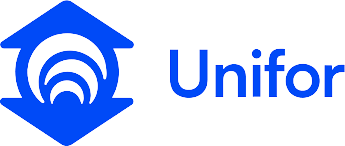

MBA em Ciência de Dados

Disciplina: Data harvesting

Prof: Ms Alex Lima

Aluno: João Paulo Barbosa Amorim Leitão

Matrícula: 2418549

**1. Artefatos**  
- Notebook Python com análise exploratória, limpeza e preparação de dados, além de **aplicação** do uso dos dados para **busca de cursos com comparação de similaridade** disponível ao final do notebook (`analysis.ipynb`).

- Notebook Python com scrapping e persistência de dados, utilizando Requests, BeautifulSoup e Selenium (`Data harvesting - Projeto final.ipynb`).

- Arquivo contendo lista de dependências para executar os dois notebooks (`requirements.txt`).

- Base de dados bruta (`scrapped_datasets/courses.csv`).

- Base de dados limpa (`scrapped_datasets/cleaned_courses.csv`).


**2 Execução**

1. **Instalar Dependências:**
   ```bash
   pip install -r requirements.txt
   ```

2. **Executar o Notebook de Análise:**
   ```bash
   jupyter notebook analysis.ipynb
   ```

3. **Executar o Notebook de Scraping:**
   ```bash
   jupyter notebook Data\ harvesting\ -\ Projeto\ final.ipynb
   ```


Isso garantirá que todos os componentes necessários estejam disponíveis e prontos para execução.



 **3 Leitura da base de dados**

In [178]:
import pandas as pd
import numpy as np

# Carregar o CSV com o delimitador correto
df = pd.read_csv("scrapped_datasets/courses.csv", delimiter=";", encoding='utf-8')


**3 Visão geral dos dados**

Exibir as primeiras linhas do DataFrame


In [179]:
print(df.head())



                                         Course Name  \
0                Build_a_free_website_with_WordPress   
1             Business_Analysis_&_Process_Management   
2               Getting_Started_with_Microsoft_Excel   
3  Inglês_para_interações_comuns_no_local_de_trab...   
4  Python_para_ciência_de_dados,_IA_e_desenvolvim...   

                                               Title  \
0                Build a free website with WordPress   
1             Business Analysis & Process Management   
2               Getting Started with Microsoft Excel   
3  Inglês para interações comuns no local de trab...   
4  Python para ciência de dados, IA e desenvolvim...   

                                           Image URL  \
0  https://d3njjcbhbojbot.cloudfront.net/api/util...   
1  https://d3njjcbhbojbot.cloudfront.net/api/util...   
2  https://d3njjcbhbojbot.cloudfront.net/api/util...   
3  https://d3njjcbhbojbot.cloudfront.net/api/util...   
4  https://d3njjcbhbojbot.cloudfront.net/api/u

**3.1 Resumo estatístico**

In [180]:
# Resumo estatístico do DataFrame
print(df.describe(include='all'))

                          Course Name                          Title  \
count                            1000                           1000   
unique                            996                            996   
top     Introdução_à_análise_de_dados  Introdução à análise de dados   
freq                                2                              2   

                                                Image URL  \
count                                                1000   
unique                                                999   
top     https://d3njjcbhbojbot.cloudfront.net/api/util...   
freq                                                    2   

                                              Course Link Institution  \
count                                                1000        1000   
unique                                               1000         160   
top     https://www.coursera.org/specializations/intro...         IBM   
freq                                     

**3.2 Informações sobre o dataframe**

In [181]:
# Informações sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Course Name        1000 non-null   object
 1   Title              1000 non-null   object
 2   Image URL          1000 non-null   object
 3   Course Link        1000 non-null   object
 4   Institution        1000 non-null   object
 5   Skills             1000 non-null   object
 6   Rating             1000 non-null   object
 7   Number of Reviews  1000 non-null   object
 8   Level              1000 non-null   object
 9   Course Type        1000 non-null   object
 10  Duration           1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB
None


**3.3 Distribuição de Valores Ausentes**

Course Name          0
Title                0
Image URL            0
Course Link          0
Institution          0
Skills               0
Rating               0
Number of Reviews    0
Level                0
Course Type          0
Duration             0
dtype: int64


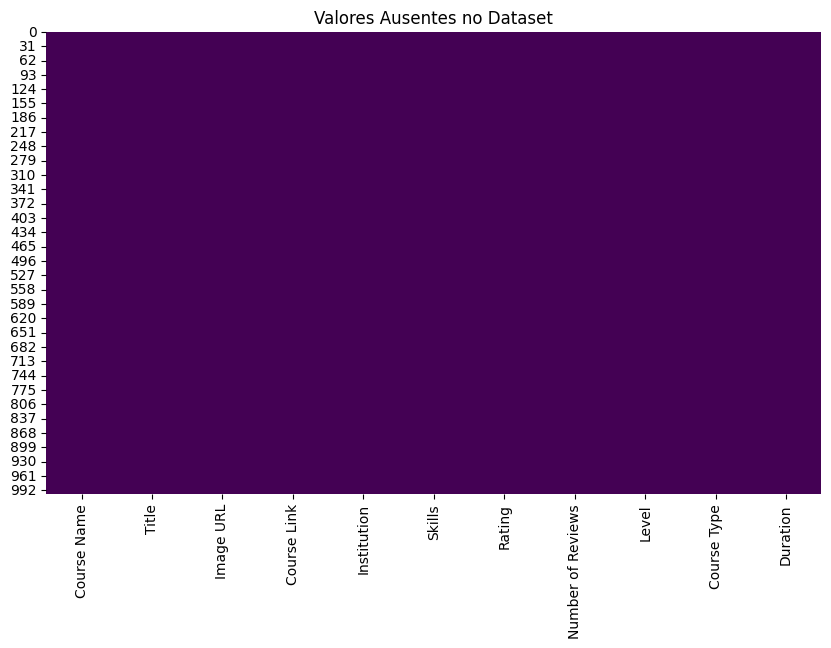

In [182]:
# Verificar valores ausentes por coluna
missing_values = df.isnull().sum()
print(missing_values)

# Visualizar valores ausentes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Ausentes no Dataset')
plt.show()

**3.4. Distribuição das Variáveis Numéricas**


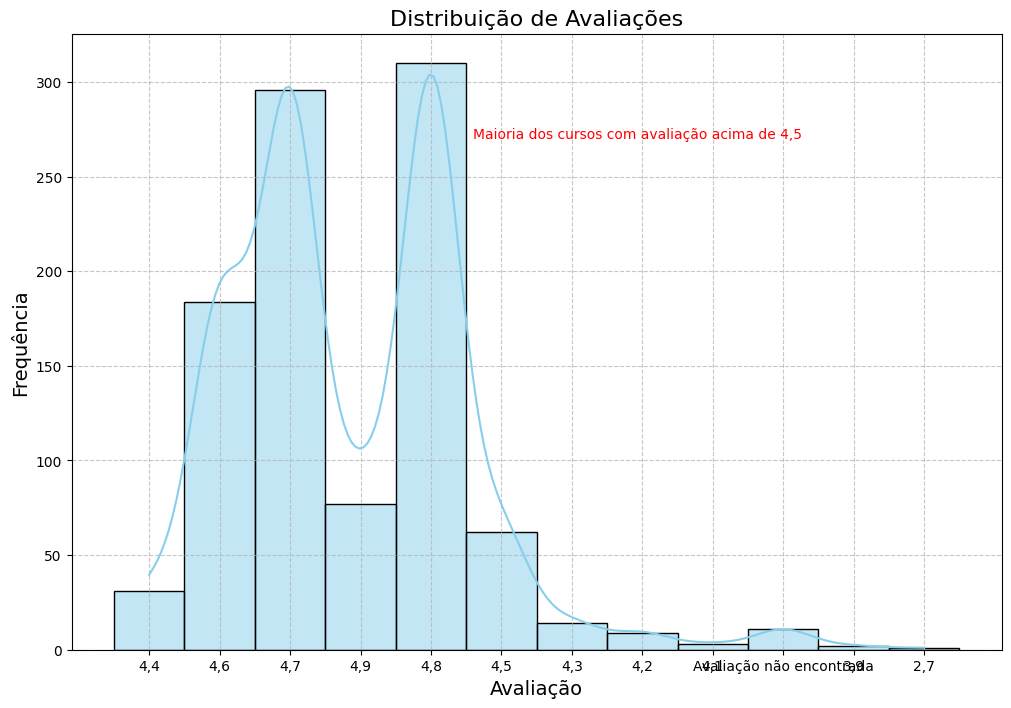

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um histograma
plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
sns.histplot(df["Rating"], bins=30, kde=True, color='skyblue')  # Mudar a cor do histograma

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de Avaliações', fontsize=16)
plt.xlabel('Avaliação', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Nota sobre avaliações altas
plt.text(4.6, 270, 'Maioria dos cursos com avaliação acima de 4,5', fontsize=10, color='red')

# Exibir o gráfico
plt.show()

O histograma mostra que a maioria dos cursos tem uma avaliação entre 4,6 e 4,9. Isso indica que os cursos são geralmente bem avaliados pelos alunos. 

A curva KDE (Kernel Density Estimate) também confirma essa tendência, com um pico próximo à avaliação 4,8. No entanto, há alguns cursos com avaliações mais baixas, como 2,7 e "Avaliação não encontrada", mas esses casos são menos frequentes.


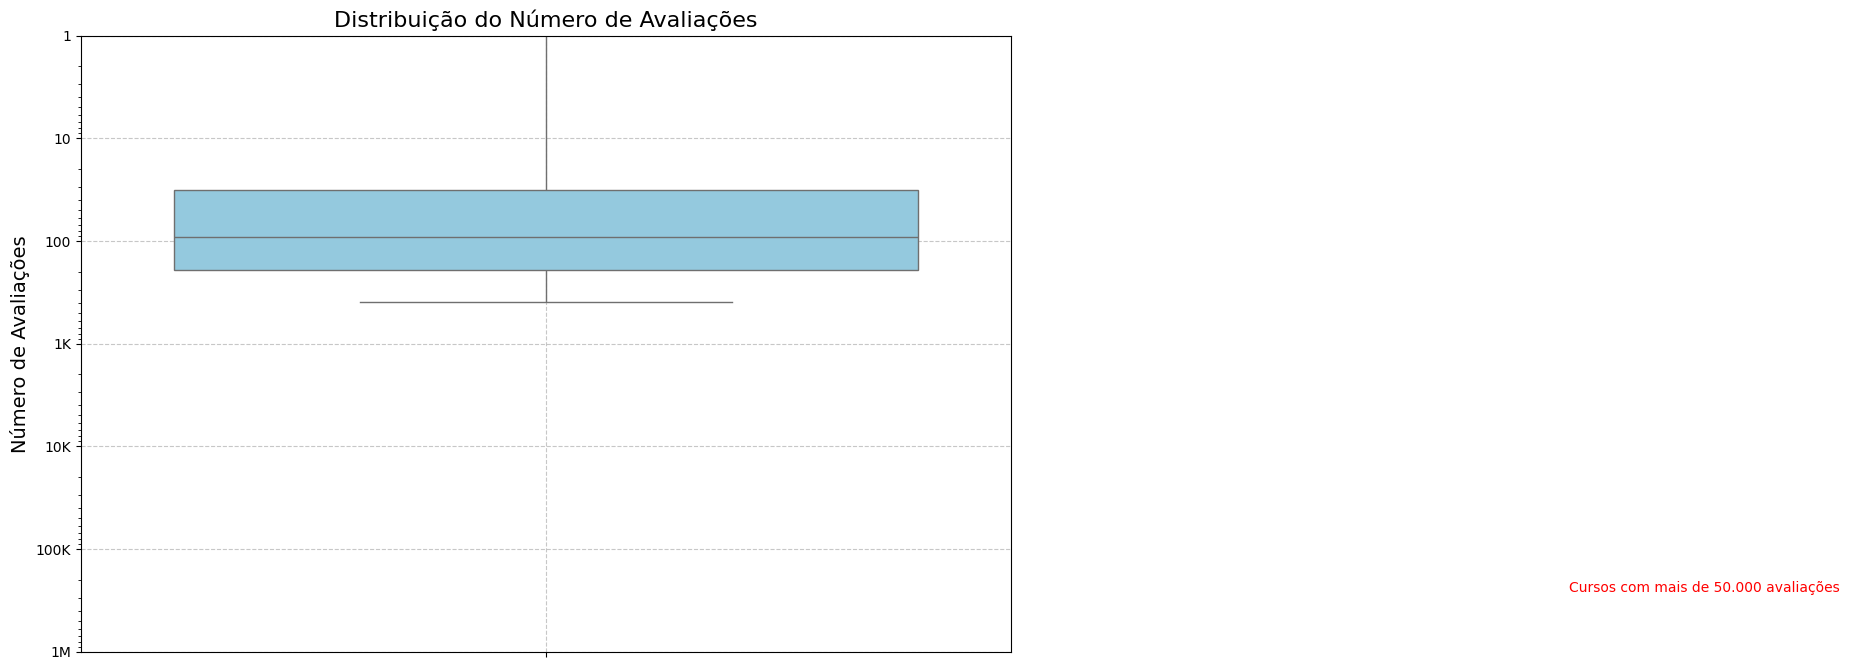

In [184]:


# Criar um boxplot 
plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
sns.boxplot(y=df["Number of Reviews"], color='skyblue')  # Mudar a cor do boxplot

# Usar escala logarítmica
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1K', '10K', '100K', '1M'])

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição do Número de Avaliações', fontsize=16)
plt.ylabel('Número de Avaliações', fontsize=14)

# Adicionar nota sobre outliers
plt.text(1.1, 260000, 'Cursos com mais de 50.000 avaliações', fontsize=10, color='red')

# Exibir o gráfico
plt.show()


O boxplot revela que o número de avaliações varia significativamente entre os cursos. A mediana está em torno de 10 mil avaliações, indicando que a maioria dos cursos tem uma quantidade moderada de avaliações. 

No entanto, existem algumas observações extremas, com cursos tendo mais de 50 mil avaliações. Além disso, há muitos cursos com poucas avaliações, representados pelos pontos abaixo da linha inferior do boxplot.

Qualidade dos Cursos: A alta concentração de avaliações entre 4,6 e 4,9 sugere que a qualidade dos cursos é geralmente boa.


**3.5. Distribuição das Variáveis Categóricas**

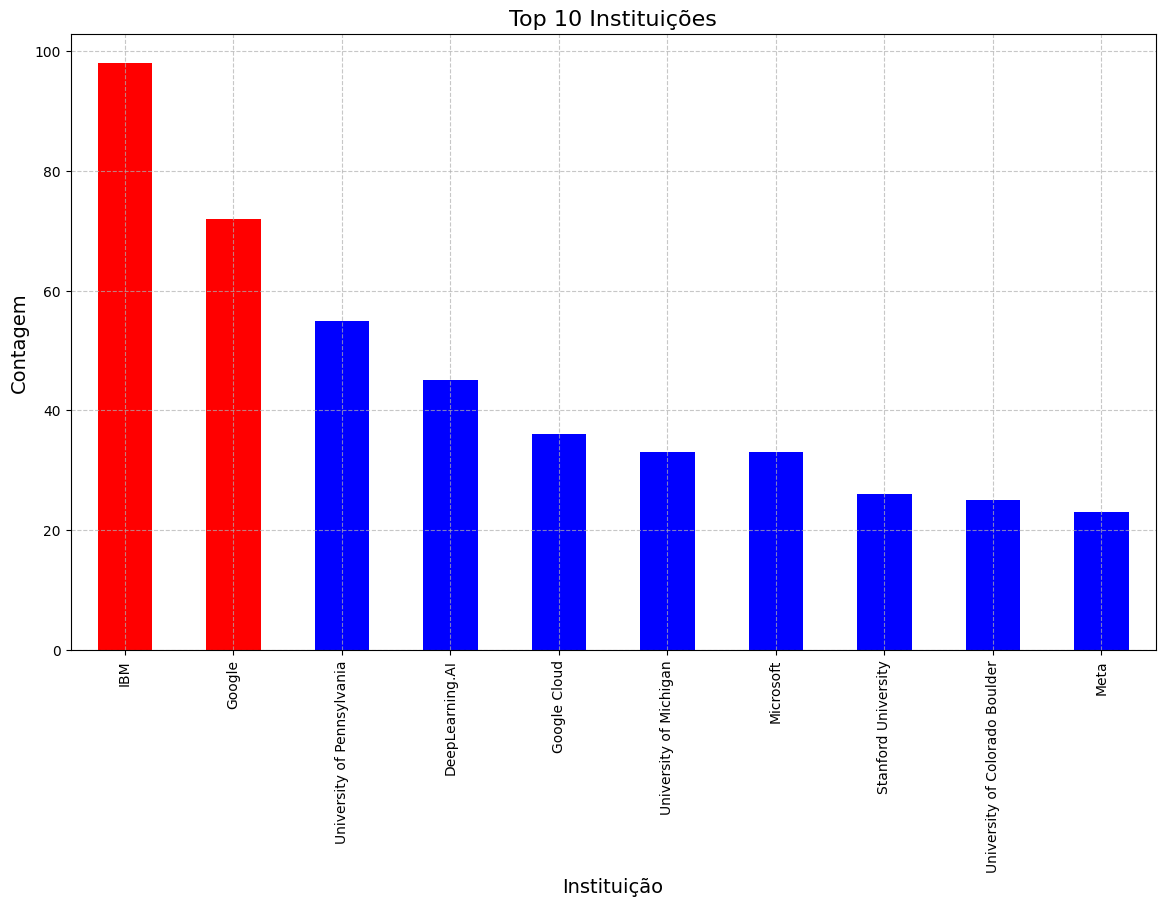

In [185]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com ajustes visuais
plt.figure(figsize=(14, 8))  # Aumentar o tamanho da figura

# Usar cores diferentes para destacar IBM e Google
colors = ['red' if i in [0, 1] else 'blue' for i in range(10)]
df["Institution"].value_counts().head(10).plot(kind='bar', color=colors)

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Top 10 Instituições', fontsize=16)
plt.xlabel('Instituição', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Exibir o gráfico
plt.show()



IBM e Google Dominam : IBM e Google são as instituições com o maior número de cursos, com cerca de 100 e 70 cursos respectivamente.

Universidades Prestigiadas : Universidades como a University of Pennsylvania, Stanford University e University of Michigan também têm uma presença significativa.

Diversidade de Instituições : Além de empresas tecnológicas e universidades tradicionais, instituições especializadas em AI como DeepLearning.AI também aparecem na lista.

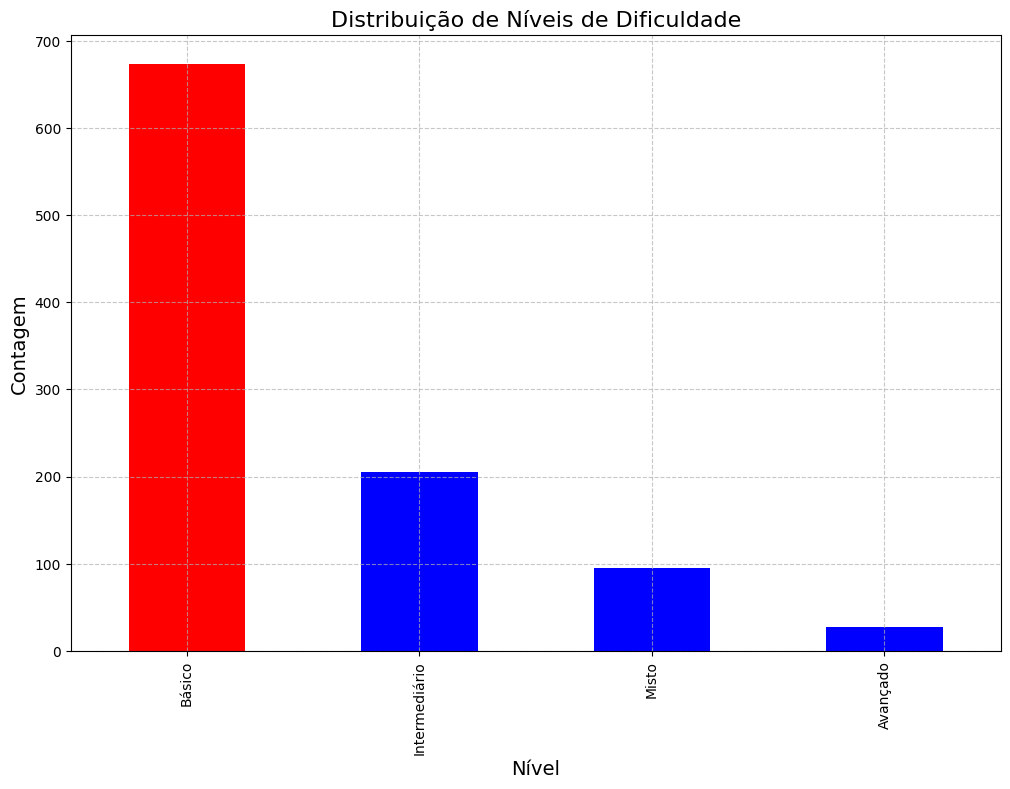

In [186]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com ajustes visuais
plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura

# Usar cores diferentes para destacar os níveis básico e intermediário
colors = ['red' if i in [0] else 'blue' for i in range(4)]
df["Level"].value_counts().plot(kind='bar', color=colors)

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de Níveis de Dificuldade', fontsize=16)
plt.xlabel('Nível', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Exibir o gráfico
plt.show()

Nível Básico Dominante : A maioria dos cursos é classificada como nível básico, com mais de 600 cursos.

Intermediário em Segundo Lugar : O segundo nível mais comum é o intermediário, com cerca de 200 cursos.

Misto e Avançado Menos Frequentes : Os níveis misto e avançado são menos frequentes, com cerca de 100 e 20 cursos respectivamente.


**3.6. Distribuição da Duração dos Cursos**

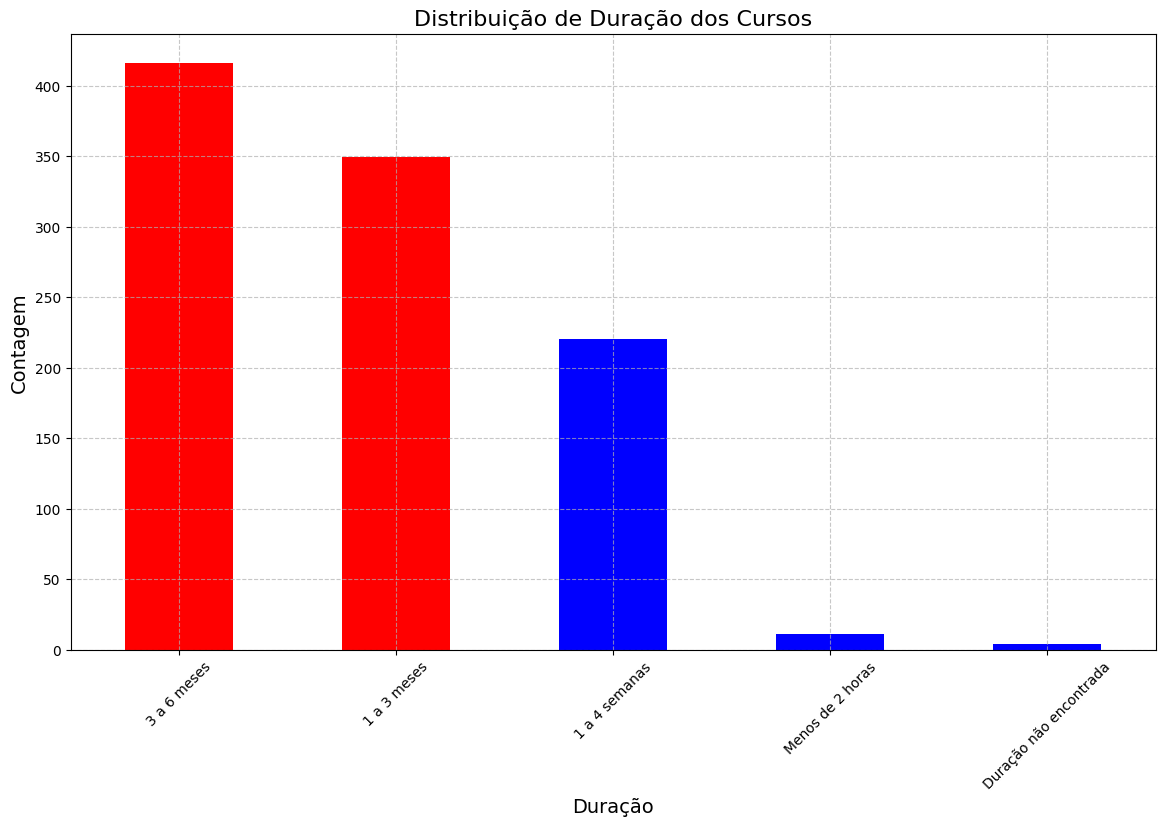

In [187]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com ajustes visuais
plt.figure(figsize=(14, 8))  # Aumentar o tamanho da figura

# Usar cores diferentes para destacar as duas durações mais comuns
colors = ['red' if i in [0, 1] else 'blue' for i in range(5)]
df["Duration"].value_counts().plot(kind='bar', color=colors)

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de Duração dos Cursos', fontsize=16)
plt.xlabel('Duração', fontsize=14)
plt.ylabel('Contagem', fontsize=14)



# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

Durações Mais Comuns : A maioria dos cursos tem uma duração entre 3 a 6 meses, seguida por cursos com duração entre 1 a 3 meses.

Cursos Curtos e Longos : Há poucos cursos com duração menor que 2 horas ou com duração não encontrada.


### **4 Pré-processamento dos Dados**

In [188]:

# Renomear colunas para facilitar o uso
colunas = [
    "Course Name", "Title", "Image URL", "Course Link", "Institution",
    "Skills", "Rating", "Number of Reviews", "Level", "Course Type", "Duration"
]
df.columns = colunas


In [189]:

# Remover linhas onde 'Skills', 'Rating' ou 'Number of Reviews' estão vazios
df = df.dropna(subset=["Skills", "Rating", "Number of Reviews"])

# Substituir valores não numéricos na coluna "Rating" por NaN
df["Rating"] = df["Rating"].replace("Avaliação não encontrada", np.nan)

# Converter Rating (ex: "4,8" → 4.8)
df["Rating"] = df["Rating"].str.replace(",", ".").astype(float)

# Listar valores únicos na coluna "Number of Reviews"
unique_values = df["Number of Reviews"].unique()
print(unique_values)


['1,6 mil' '6,2 mil' '11 mil' '3,5 mil' '40 mil' '52 mil' '16 mil'
 '4,8 mil' '30 mil' '5,1 mil' '1,9 mil' '20 mil' '2,7 mil' '17 mil'
 '6,7 mil' '18 mil' '39 mil' '92 mil' '2,5 mil' '9,5 mil' '31 mil'
 '33 mil' '3,2 mil' '1,7 mil' '3,9 mil' '22 mil' '3,8 mil' '19 mil'
 '3,6 mil' '4,3 mil' '9,3 mil' '2,6 mil' '1,2 mil' '492' '53 mil'
 '5,5 mil' '1,1 mil' '5 mil' '164 mil' '200 mil' '807' '677' '2,9 mil'
 '3,7 mil' '2,8 mil' '1,8 mil' '2,1 mil' '140 mil' '6,3 mil' '1,5 mil'
 '7,1 mil' '37 mil' '5,9 mil' '2,2 mil' '9,2 mil' '4,4 mil' '9 mil'
 '6,6 mil' '5,2 mil' '5,8 mil' '125 mil' '4,2 mil' '629' '1 mil' '8,2 mil'
 '13 mil' '46 mil' '710' '4,6 mil' '3,4 mil' '6,1 mil' '8,6 mil' '257'
 '3 mil' '272' '7,5 mil' '48 mil' '638' '58 mil' '7,7 mil' '722' '14 mil'
 '726' '200' '64 mil' '2,3 mil' '268' '5,4 mil' '27' '23 mil' '231 mil'
 '208' '356' '89 mil' '26 mil' '21 mil' '179' '2 mil' '3,1 mil' '699'
 '742' '70 mil' '641' '6,9 mil' '323' '32 mil' '1,3 mil' '2,4 mil'
 '1,4 mil' '10 mil' '305'

In [190]:

# Substituir valores inválidos na coluna "Number of Reviews" por NaN
invalid_values = [
    "Número de avaliações não encontrado",
    "Número de avaliações não encontrado ",
    " Número de avaliações não encontrado",
    "Número de avaliações não encontrado.",
    "Não informado"
]
df["Number of Reviews"] = df["Number of Reviews"].replace(invalid_values, np.nan)

# Função para converter "X mil" em número inteiro
def convert_to_number(value):
    if isinstance(value, str):
        if "mil" in value:
            # Extrair o número antes de "mil" e multiplicar por 1000
            number = value.replace("mil", "").strip().replace(",", ".")
            return int(float(number) * 1000)
        elif value.isdigit():  # Se for um número direto
            return int(value)
        else:
            return np.nan  # Caso não seja um formato reconhecido
    return value

# Aplicar a função de conversão
df["Number of Reviews"] = df["Number of Reviews"].apply(convert_to_number)

# Substituir NaN por 0 e converter para inteiro
df["Number of Reviews"] = df["Number of Reviews"].fillna(0).astype(int)

# Dividir habilidades em uma lista
df["Skills"] = df["Skills"].str.split(",")

# Remover linhas com NaN em colunas críticas
df = df.dropna(subset=["Rating", "Number of Reviews"])

# Salvar o DataFrame limpo em um novo arquivo CSV
df.to_csv("scrapped_datasets/cleaned_courses.csv", index=False)

print("Dados carregados e limpos com sucesso!")
print(df.head())
print(df.dtypes)

Dados carregados e limpos com sucesso!
                                         Course Name  \
0                Build_a_free_website_with_WordPress   
1             Business_Analysis_&_Process_Management   
2               Getting_Started_with_Microsoft_Excel   
3  Inglês_para_interações_comuns_no_local_de_trab...   
4  Python_para_ciência_de_dados,_IA_e_desenvolvim...   

                                               Title  \
0                Build a free website with WordPress   
1             Business Analysis & Process Management   
2               Getting Started with Microsoft Excel   
3  Inglês para interações comuns no local de trab...   
4  Python para ciência de dados, IA e desenvolvim...   

                                           Image URL  \
0  https://d3njjcbhbojbot.cloudfront.net/api/util...   
1  https://d3njjcbhbojbot.cloudfront.net/api/util...   
2  https://d3njjcbhbojbot.cloudfront.net/api/util...   
3  https://d3njjcbhbojbot.cloudfront.net/api/util...   
4  http


---

### **5. Análises Propostas**  

#### **5.1. Habilidades Mais Demandadas**  


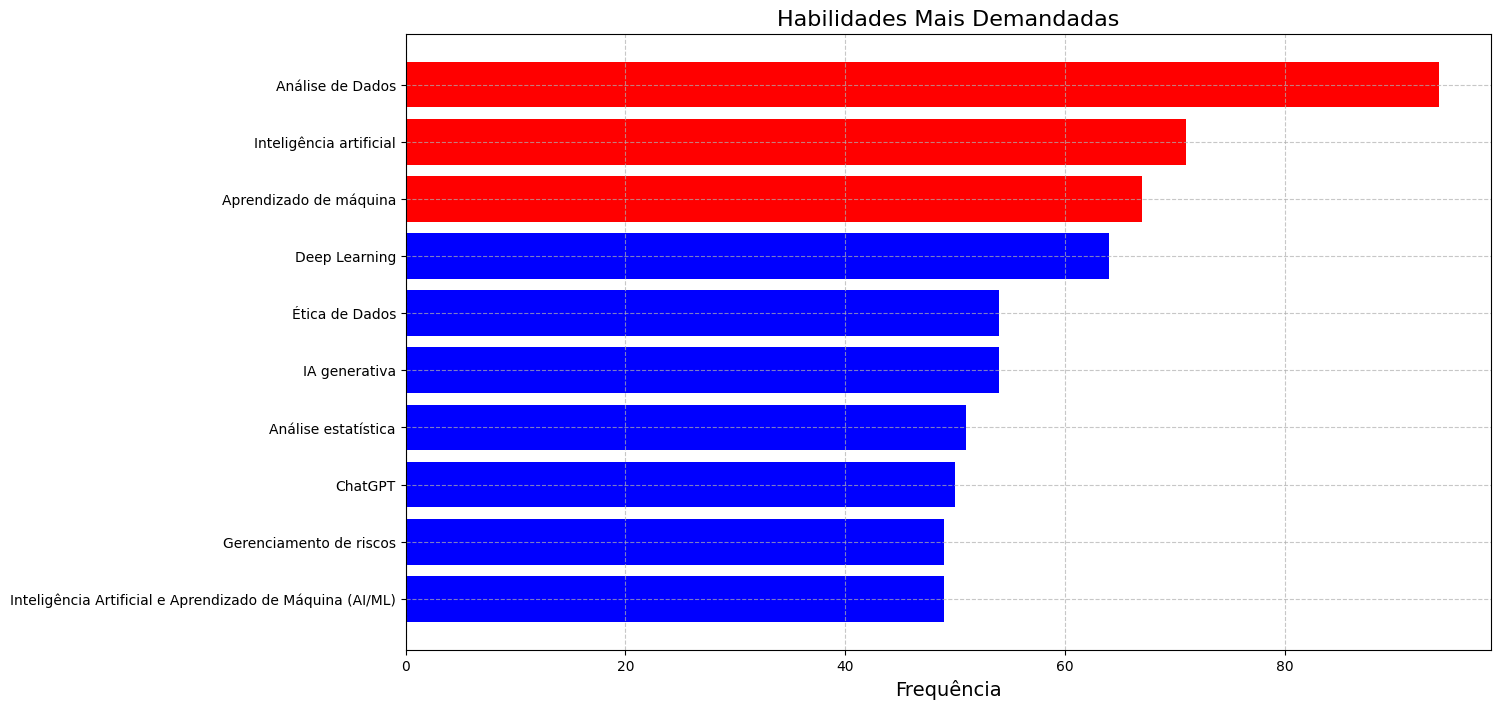

0    [WordPress,  Content Management Systems,  Web ...
1    [Process Analysis,  Business Process,  Busines...
2    [Microsoft Excel,  Excel Formulas,  Spreadshee...
3    [Comunicações interpessoais,  Cumprimentar os ...
4    [Processamento de dados,  estrutura de dadoses...
Name: Skills, dtype: object


In [191]:
import matplotlib.pyplot as plt
from collections import Counter

# Filtrar apenas valores válidos (listas) na coluna "Skills"
valid_skills = df["Skills"].dropna()

# Extrair todas as habilidades em uma lista única
all_skills = [
    skill.strip() 
    for sublist in valid_skills  # Iterar sobre cada lista na coluna "Skills"
    for skill in sublist         # Iterar sobre cada habilidade dentro da lista
]

# Contar as 10 habilidades mais comuns
top_skills = Counter(all_skills).most_common(10)

# Visualização
plt.figure(figsize=(14, 8))  # Aumentar o tamanho da figura

# Usar cores diferentes para destacar as três habilidades mais comuns
colors = ['red' if i in [0, 1, 2] else 'blue' for i in range(10)]
plt.barh([s[0] for s in top_skills], [s[1] for s in top_skills], color=colors)

# Adicionar uma grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Habilidades Mais Demandadas', fontsize=16)
plt.xlabel('Frequência', fontsize=14)

# Inverter o eixo y para mostrar a habilidade mais demandada no topo
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.show()

# Mostrar as primeiras linhas da coluna "Skills"
print(df["Skills"].head())

Análise de Dados Dominante : A habilidade "Análise de Dados" é a mais demandada, com uma frequência significativamente maior que as outras.

Habilidades Relacionadas à IA : Habilidades como "Inteligência artificial", "Aprendizado de máquina", "Deep Learning", e "IA generativa" também são bastante demandadas.

Ética de Dados Importante : A ética de dados aparece como uma habilidade importante, indicando um foco crescente em questões éticas no tratamento de dados.


#### **5.2. Comparativo de instituições**  


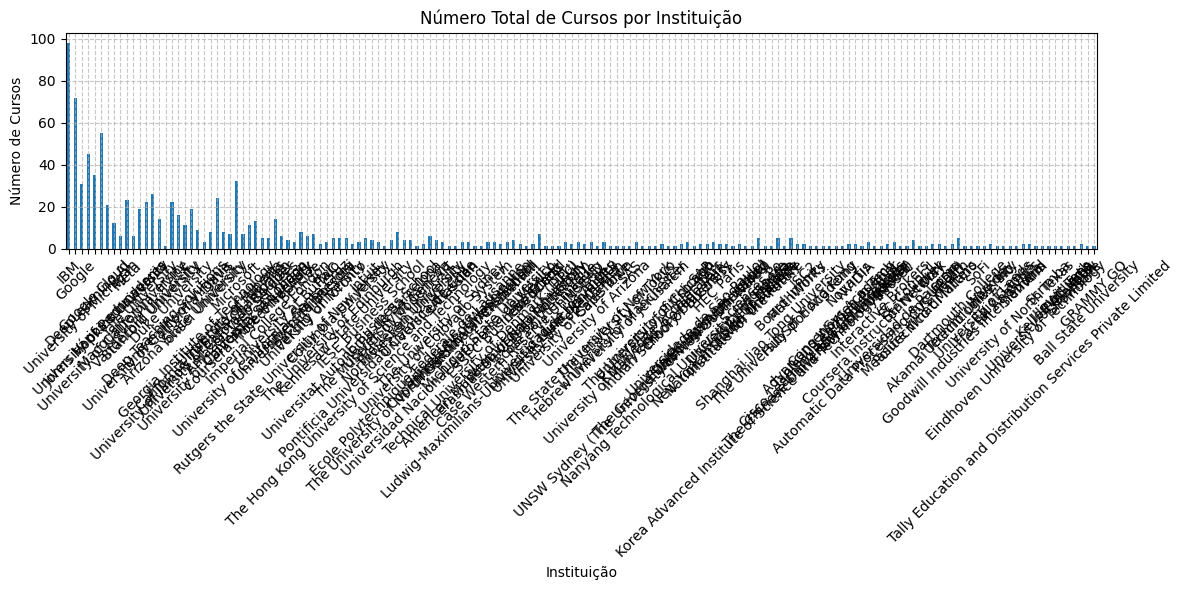

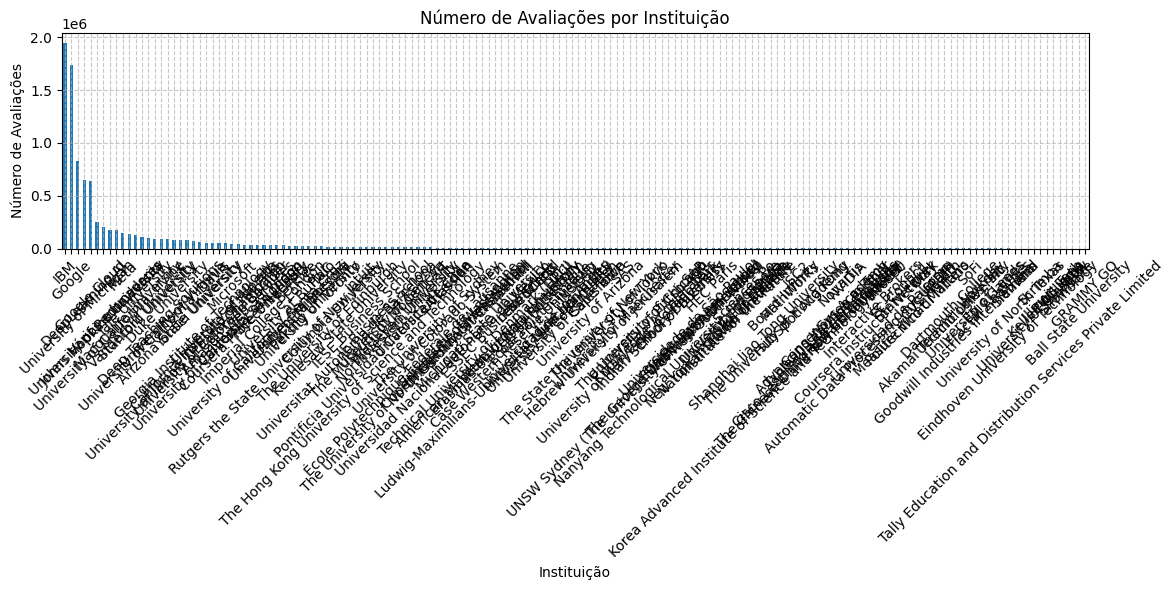

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por instituição e calcular métricas
institution_stats = df.groupby("Institution").agg({
    "Rating": "mean",
    "Number of Reviews": "sum",
    "Course Name": "count"
}).rename(columns={"Course Name": "Total Courses"})

# Ordenar por número de inscrições
institution_stats = institution_stats.sort_values("Number of Reviews", ascending=False)

# Plotar Número Total de Cursos por Instituição
plt.figure(figsize=(12, 6))
institution_stats["Total Courses"].plot(kind="bar")
plt.title("Número Total de Cursos por Instituição")
plt.xlabel("Instituição")
plt.ylabel("Número de Cursos")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotar Número de Avaliações por Instituição
plt.figure(figsize=(12, 6))
institution_stats["Number of Reviews"].plot(kind="bar")
plt.title("Número de Avaliações por Instituição")
plt.xlabel("Instituição")
plt.ylabel("Número de Avaliações")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **5.3. Análise de Duração e Dificuldade**  

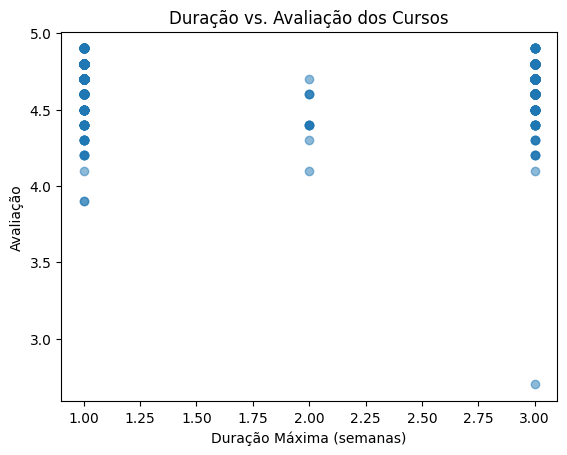

In [193]:
# Converter duração para semanas (ex: "1 a 4 semanas" → 4)
df["max_weeks"] = df["Duration"].str.extract(r"(\d+)").astype(float)

# Relação entre duração e avaliação
plt.scatter(df["max_weeks"], df["Rating"], alpha=0.5)
plt.title("Duração vs. Avaliação dos Cursos")
plt.xlabel("Duração Máxima (semanas)")
plt.ylabel("Avaliação")
plt.show()




#### **5.4. Aplicação de Busca de Cursos por Similaridade**  


In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combinar título + descrição + habilidades para busca
df["content"] = (
    df["Course Name"].fillna("") + " " +
    df["Skills"].apply(lambda x: " ".join(x)).fillna("")
)

# Vetorização TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["content"])

def search_courses(query, top_n=5):
    query_vec = tfidf.transform([query])
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][["Course Name", "Institution", "Rating", "Number of Reviews"]]

**Exemplo: Buscar cursos relacionados a "data science"**

In [195]:
print(search_courses("data science"))

                                           Course Name  \
112                   Introduction_to_Forensic_Science   
465  Preparing_for_Google_Cloud_Certification:_Clou...   
774                                     SAS_Programmer   
578                                  Google_データアナリティクス   
590       Creating_Business_Value_with_Data_and_Looker   

                                     Institution  Rating  Number of Reviews  
112  Nanyang Technological University, Singapore     4.9               2600  
465                                 Google Cloud     4.6              19000  
774                                          SAS     4.8               3500  
578                                       Google     4.7                604  
590                                 Google Cloud     4.7               1200  
